In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et

In [2]:
sns.set(font_scale=1.5)
sns.set_style("white")

In [3]:
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [5]:
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

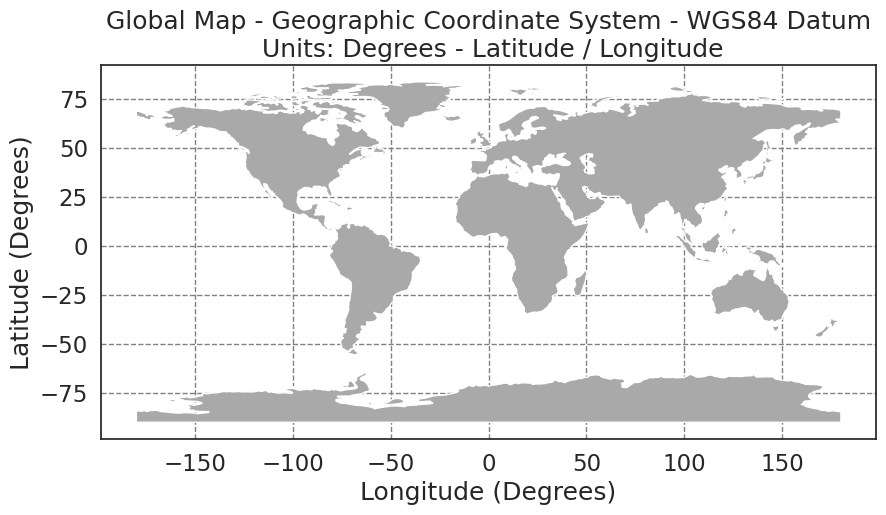

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
worldBound.plot(color='darkgrey',
                ax=ax)
ax.set(xlabel="Longitude (Degrees)",
        ylabel="Latitude (Degrees)",
        title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')

In [ ]:
add_points = np.array([[-105.2519,   40.0274], 
                       [  10.75  ,   59.95  ], 
                       [   2.9833,   39.6167]])

city_locations = [Point(xy) for xy in add_points]
city_locations

: 